# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
import utils
import preprocess
import detect_answer 
import detect_cross

# Load image

In [2]:
plt.rcParams['figure.figsize'] = [8, 8]

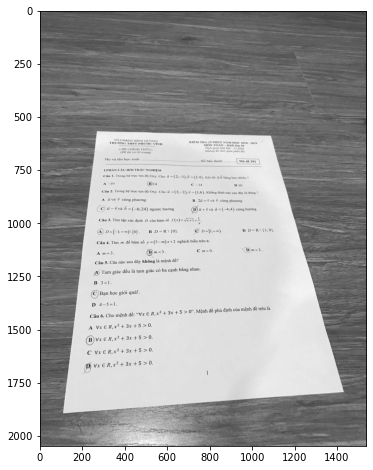

In [3]:
img = cv2.imread('examf.jpg', 0)
plt.imshow(img, cmap='gray')

# Preprocessor

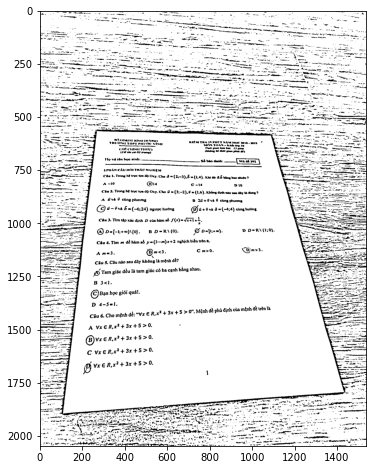

In [4]:
binary_img = preprocess.toBinary(img, (5,5))

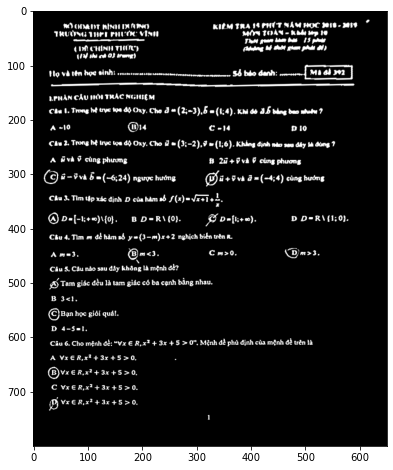

In [5]:
thresh = preprocess.threshold(binary_img)
approx,box = preprocess.findContour(thresh)
binary_img = preprocess.turnning(approx,box,binary_img)
img = preprocess.turnning(approx,box,img)
dsize = (650,800)
binary_img = cv2.resize(binary_img,dsize)
img = cv2.resize(img,dsize)
plt.imshow(binary_img, cmap='gray')

# Mark

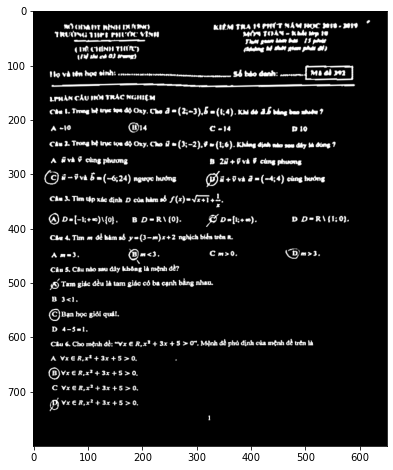

In [6]:
close = utils.closing(binary_img, (2,2))

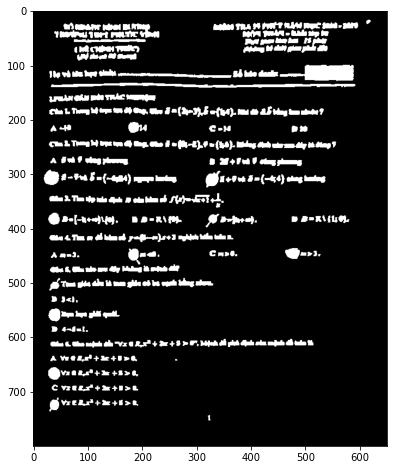

In [7]:
filled = utils.fill_holes(close)

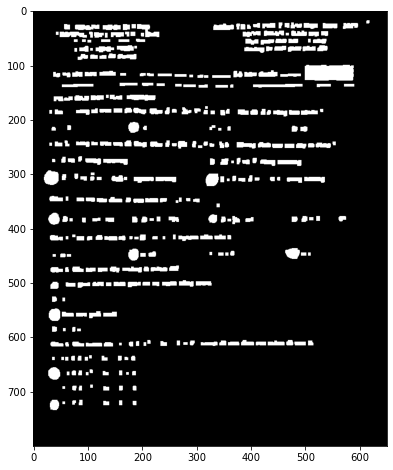

In [8]:
open = utils.opening(filled, (5,5))

In [9]:
contours = utils.find_contours(open)

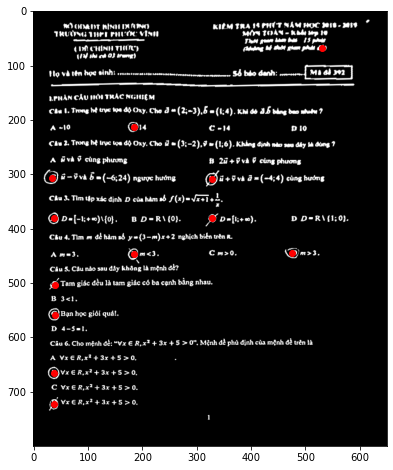

[[38, 723],
 [38, 666],
 [39, 558],
 [39, 504],
 [184, 447],
 [476, 445],
 [329, 381],
 [38, 381],
 [328, 309],
 [33, 306],
 [184, 213],
 [531, 68]]

In [10]:
circle_centers = utils.detect_circle(binary_img, contours, 0.7, 135)
circle_centers

In [11]:
choices = detect_cross.get_circles_no_cross(close, circle_centers)

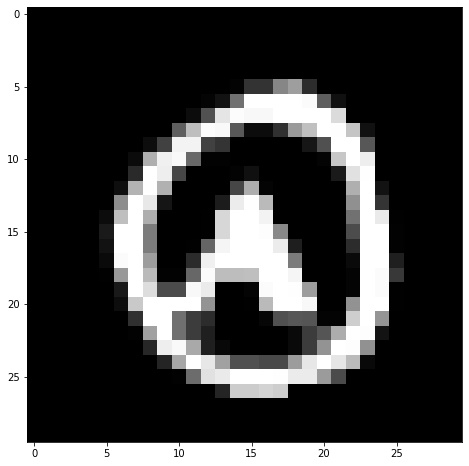

In [12]:
plt.imshow(choices[3], cmap='gray')

In [13]:
answers = detect_answer.get_answer(choices)
answers

[0, 2, 0, 3, 2, 1]

In [14]:
right_answers = ['B', 'B', 'A', 'A', 'A', 'C']
right_answers = detect_answer.convert_answer_type(right_answers)
right_answers

[1, 1, 0, 0, 0, 2]

In [15]:
score = utils.get_score(answers, right_answers)
print(score)

1.6666666666666667
